In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
import numpy as np
import cv2
from keras.utils import np_utils
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import splitfolders
import pandas as pd

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
input_folder = 'C:/Users/Lenovo/Downloads/Augmented_dataset/Augmented__dataset'
#ration of split is 70%, 20% and 10%
splitfolders.ratio(input_folder, output="H:/Shortcuts/Research paper/flowerNET/flower", 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None)

Copying files: 4342 files [01:19, 54.30 files/s] 


In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'H:/Shortcuts/Research paper/flowerNET/flower/train'
valid_path = 'H:/Shortcuts/Research paper/flowerNET/flower/val'
test_path = 'H:/Shortcuts/Research paper/flowerNET/flower/test'

In [14]:
  # useful for getting number of classes
folders = glob('H:/Shortcuts/Research paper/flowerNET/flower/train/*')
len(folders)

3

In [15]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [5]:

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=IMAGE_SIZE + [3]))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(folders), activation = 'softmax'))

print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [16]:
IMAGE_SIZE=224
BATCH_SIZE=32

#pre=processing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0,
                                   vertical_flip=False,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

validation_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 3037 images belonging to 3 classes.
Found 867 images belonging to 3 classes.


In [17]:
labels = (training_set.class_indices)
print(labels)

{'Black Spot': 0, 'Downy mildew': 1, 'Fresh Leaf': 2}


In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [9]:

r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set))

Epoch 1/35
95/95 [==============================] - 318s 3s/step - loss: 0.6556 - accuracy: 0.6450 - val_loss: 0.5584 - val_accuracy: 0.7093
Epoch 2/35
95/95 [==============================] - 223s 2s/step - loss: 0.5562 - accuracy: 0.6846 - val_loss: 0.5130 - val_accuracy: 0.6782
Epoch 3/35
95/95 [==============================] - 222s 2s/step - loss: 0.5029 - accuracy: 0.7188 - val_loss: 0.4841 - val_accuracy: 0.8224
Epoch 4/35
95/95 [==============================] - 225s 2s/step - loss: 0.4176 - accuracy: 0.8153 - val_loss: 0.4858 - val_accuracy: 0.8385
Epoch 5/35
95/95 [==============================] - 288s 3s/step - loss: 0.3376 - accuracy: 0.8604 - val_loss: 0.3395 - val_accuracy: 0.8962
Epoch 6/35
95/95 [==============================] - 222s 2s/step - loss: 0.2470 - accuracy: 0.9197 - val_loss: 0.1859 - val_accuracy: 0.9354
Epoch 7/35
95/95 [==============================] - 236s 2s/step - loss: 0.1856 - accuracy: 0.9388 - val_loss: 0.1683 - val_accuracy: 0.9400
Epoch 8/35
95

In [10]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
val_loss, val_acc = model.evaluate(validation_set, steps=16)
print("Traning Loss and traing accurcy: ",train_loss, train_acc )
print("Validation Loss and Validation accurcy: ",val_loss, val_acc )


16/16 [==============================] - 30s 2s/step - loss: 0.0630 - accuracy: 0.9844
Traning Loss and traing accurcy:  0.006831722799688578 0.99609375
Validation Loss and Validation accurcy:  0.06297191232442856 0.984375


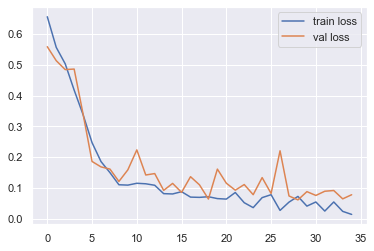

In [11]:
# loss
sns.set_theme()
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('H:/Shortcuts/Research paper/flowerNET/lcnn_loss.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/lcnn_loss')
plt.show()


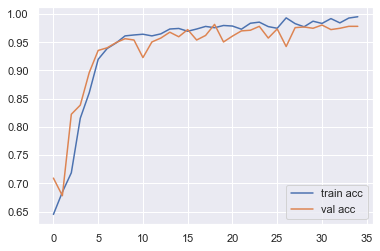

In [12]:
# accuracies
sns.set_theme()
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/lcnn_acc.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/acc_loss')
plt.show()


In [13]:
model.save("H:/Shortcuts/Research paper/flowerNET/35-epoch/MCNN/lcnn.h5")

In [18]:
from keras.models import load_model
model = load_model('H:/Shortcuts/Research paper/flowerNET/35-epoch/MCNN/lcnn.h5')

In [19]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=False,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 438 files belonging to 3 classes.


In [21]:
class_names = testing_set.class_names
class_names

['Black Spot', 'Downy mildew', 'Fresh Leaf']

In [20]:
# Extracting all test image and corrosponding labels from tesing image
test_label=[]
test_img=[]
for img, label in testing_set:
  #print(label.numpy())
    test_label.append(label.numpy())
    test_img.append(img.numpy())
print("Total batch of test label: ",len(test_label))
print("Total batch of test image: ",len(test_img))

###############################################################################################

# Extracting only all test image  from tesing image batch list
actual_img=[]
for i in range(len(test_img)):
    for i in test_img[i]:
        i = i*(1/255) # we have to rescale the test image as well to feed the model
        actual_img.append(i)

print("Total Number of image: ", len(actual_img))


# Extracting only all test image  labels from tesing image batch list
actual_label=[]
for i in range(len(test_label)):
    for i in test_label[i]:
        actual_label.append(class_names[i])
     
    

print("Total number of image label : ",len(actual_label))


Total batch of test label:  14
Total batch of test image:  14
Total Number of image:  438
Total number of image label :  438


Black Spot


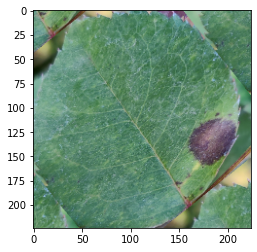

In [11]:
print(actual_label[27])
plt.imshow(actual_img[27])

In [24]:
import time
from datetime import timedelta
start = time.time()

# make prediction using loaded model
predicted_label=[]
for img in actual_img:
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array)
    label= class_names[np.argmax(predictions)]
    predicted_label.append(label)

end = time.time()
print(timedelta(seconds=end-start))

len(predicted_label)

0:00:32.770819


438

In [19]:
# Printing all evaluation matrix
print("Test accuracy: ",accuracy_score(actual_label, predicted_label))
print(classification_report(actual_label, predicted_label))

Test accuracy:  0.9794520547945206
              precision    recall  f1-score   support

  Black Spot       0.98      0.97      0.98       145
Downy mildew       0.99      0.99      0.99       149
  Fresh Leaf       0.97      0.98      0.97       144

    accuracy                           0.98       438
   macro avg       0.98      0.98      0.98       438
weighted avg       0.98      0.98      0.98       438



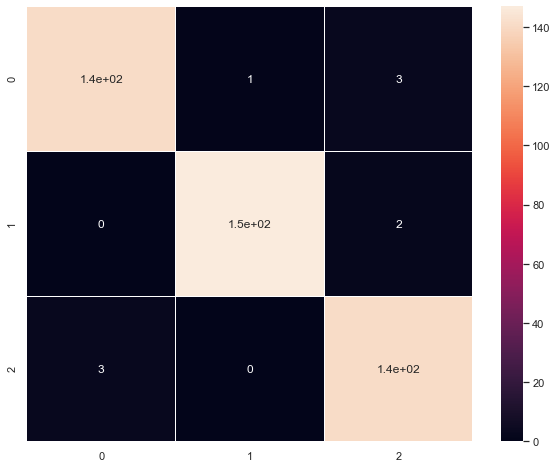

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_label, predicted_label)
import seaborn as sns
ax= plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, linewidth=.5)
plt.plot()
plt.savefig("H:/Shortcuts/Research paper/flowerNET/confussion_matrix_custome.h5.svg")

In [ ]:
# No need to run the belo cells

In [20]:
reconstructed_model = load_model("H:/Shortcuts/Research paper/flowerNET/lcnn.h5")